In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.2.0


In [2]:
# Google Drive 에 저장되어 있는 diabetes,csv 파일을 읽어들이기 위해서
# Colab 의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
# 마운트된 Google Drive 의 working directory 이동

import os

# TensorFlow 2.x working directory
working_dir = 'tensorflow_2.x_working_dir'

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(working_dir):

        os.mkdir(working_dir)

    os.chdir(working_dir)  # change working dir

    print('current dir = ', os.getcwd())

except Exception as err:

    # 원래의 dir 로 복귀
    os.chdir(original_dir)

    print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


In [4]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print("x_data.shape = ", x_data.shape)
    print("t_data.shape = ", t_data.shape)

except Exception as err:

    print(str(err))

x_data.shape =  (759, 8)
t_data.shape =  (759, 1)


In [0]:
# 은닉층이 없는, 즉 Logistic Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Flatten(input_shape=(x_data.shape[1], )))    # 노드 8개인 입력층 생성

model.add(Dense(t_data.shape[1], activation='sigmoid'))  # 노드 1개인 출력층 생성

In [6]:
model.summary()

print(model.input, model.output)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Tensor("flatten_input:0", shape=(None, 8), dtype=float32) Tensor("dense/Identity:0", shape=(None, 1), dtype=float32)


In [0]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_split=0.25)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
18/18 [==============================] - 0s 11ms/step - loss: 0.7783 - accuracy: 0.3620 - val_loss: 0.7627 - val_accuracy: 0.4000
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.7652 - accuracy: 0.3884 - val_loss: 0.7523 - val_accuracy: 0.4684
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.7539 - accuracy: 0.4112 - val_loss: 0.7435 - val_accuracy: 0.4947
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.7442 - accuracy: 0.4376 - val_loss: 0.7360 - val_accuracy: 0.4947
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.7359 - accuracy: 0.4798 - val_loss: 0.7296 - val_accuracy: 0.5105
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.7288 - accuracy: 0.5185 - val_loss: 0.7240 - val_accuracy: 0.5368
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.7223 - accuracy: 0.5448 - val_loss: 0.7191 - val_accuracy: 0.5474
Epoch 8/500


In [9]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7668


[0.48610225319862366, 0.7667984366416931]

In [10]:
# hist 타입 확인

print(type(hist))

print(type(hist.history))

# loss & accuracy of train data => hist.history['loss'], hist.history['accuracy']
# loss & accuracy of validation data => hist.history['val_loss'], hist.history['val_accuracy']

print(hist.history.keys())  

<class 'tensorflow.python.keras.callbacks.History'>
<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


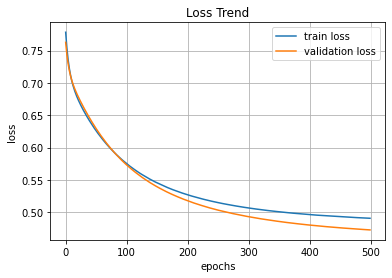

In [11]:
# loss overfitting 확인

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

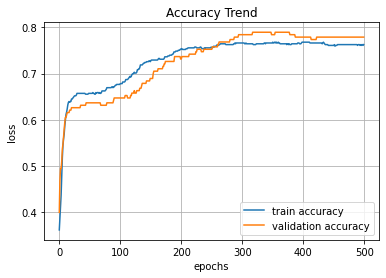

In [12]:
# accuracy overfitting 확인

import matplotlib.pyplot as plt

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

In [13]:
# index_label_prediction_list 만들기 위한 1st step

real_prediction_val = model.predict(x_data)

print(type(real_prediction_val), len(real_prediction_val))

print(real_prediction_val[:10])

<class 'numpy.ndarray'> 759
[[0.449366  ]
 [0.910043  ]
 [0.25367475]
 [0.9340566 ]
 [0.17188057]
 [0.74765295]
 [0.9189131 ]
 [0.57958335]
 [0.31601265]
 [0.57250726]]


In [14]:
# index_label_prediction_list 만들기 위한 2nd step

logical_prediction_val = (real_prediction_val > 0.5)

print(type(logical_prediction_val), len(logical_prediction_val))

print(logical_prediction_val[:10])

# 결과 가독성 높이기 위해 flatten() 이용해서 1차원 변환
# True -> 1.0, False -> 0.0  astype('float32') 이용해서 타입캐스팅

logical_prediction_val = logical_prediction_val.flatten().astype('float32')

print(type(logical_prediction_val), len(logical_prediction_val))

print(logical_prediction_val[:10])

<class 'numpy.ndarray'> 759
[[False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]]
<class 'numpy.ndarray'> 759
[0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]


In [15]:
# index_label_prediction_list 만들기 위한 3rd step

label = t_data.flatten()

comp_result = np.equal(label, logical_prediction_val)

print(type(comp_result), len(comp_result))

print('comp result = ', comp_result[:10])
print('label       = ', label[:10])
print('prediction  = ', logical_prediction_val[:10])

<class 'numpy.ndarray'> 759
comp result =  [ True  True  True  True  True  True False  True  True False]
label       =  [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
prediction  =  [0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]


In [16]:
# 오답에 대해 list comprehension 이용하여 index_label_prediction_list 구현

index_label_prediction_list = [ [idx, label[idx], logical_prediction_val[idx] ]  for idx, value in enumerate(comp_result)  if value == False ]

print(len(index_label_prediction_list))

print('Accuracy => ', 1- (len(index_label_prediction_list))/(len(x_data)))

177
Accuracy =>  0.766798418972332


In [17]:
print(index_label_prediction_list)

[[6, 0.0, 1.0], [9, 0.0, 1.0], [12, 1.0, 0.0], [14, 0.0, 1.0], [16, 0.0, 1.0], [18, 0.0, 1.0], [22, 0.0, 1.0], [23, 0.0, 1.0], [34, 1.0, 0.0], [35, 0.0, 1.0], [36, 0.0, 1.0], [37, 0.0, 1.0], [38, 1.0, 0.0], [39, 1.0, 0.0], [42, 1.0, 0.0], [46, 0.0, 1.0], [52, 1.0, 0.0], [55, 1.0, 0.0], [56, 1.0, 0.0], [59, 0.0, 1.0], [62, 0.0, 1.0], [64, 0.0, 1.0], [68, 0.0, 1.0], [91, 0.0, 1.0], [97, 0.0, 1.0], [107, 0.0, 1.0], [108, 0.0, 1.0], [113, 0.0, 1.0], [114, 0.0, 1.0], [122, 0.0, 1.0], [123, 0.0, 1.0], [126, 0.0, 1.0], [127, 0.0, 1.0], [128, 0.0, 1.0], [136, 1.0, 0.0], [141, 0.0, 1.0], [151, 1.0, 0.0], [163, 0.0, 1.0], [168, 0.0, 1.0], [169, 0.0, 1.0], [176, 1.0, 0.0], [185, 0.0, 1.0], [186, 0.0, 1.0], [187, 0.0, 1.0], [195, 0.0, 1.0], [196, 0.0, 1.0], [197, 0.0, 1.0], [209, 1.0, 0.0], [210, 1.0, 0.0], [212, 0.0, 1.0], [214, 0.0, 1.0], [216, 0.0, 1.0], [217, 0.0, 1.0], [226, 1.0, 0.0], [239, 0.0, 1.0], [240, 0.0, 1.0], [244, 1.0, 0.0], [251, 0.0, 1.0], [252, 0.0, 1.0], [255, 1.0, 0.0], [256, 